In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

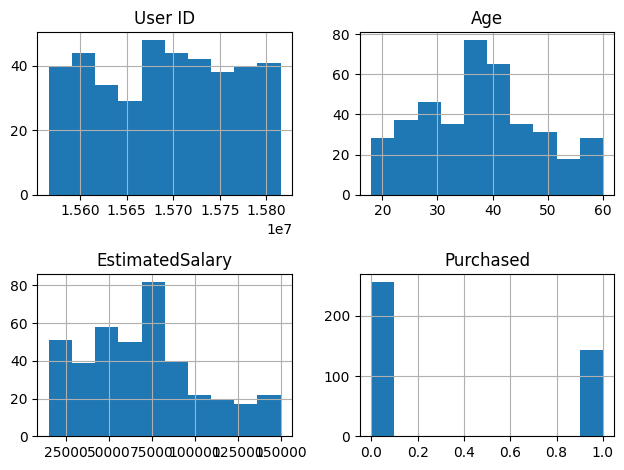

In [2]:
data = pd.read_csv('/content/Social_Network_Ads.csv',header=0)


data.hist()
plt.tight_layout()
plt.show()

In [3]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
gender_encoded = encoder.fit_transform(data[['Gender']])

gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))
data = pd.concat([data.drop('Gender', axis=1), gender_encoded_df], axis=1)

x = data[['Age', 'EstimatedSalary', 'Gender_Male']]
y = data['Purchased']

x[['Age', 'EstimatedSalary']] = StandardScaler().fit_transform(x[['Age', 'EstimatedSalary']])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<ipython-input-3-74ddd32419f7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['Age', 'EstimatedSalary']] = StandardScaler().fit_transform(x[['Age', 'EstimatedSalary']])


<Axes: >

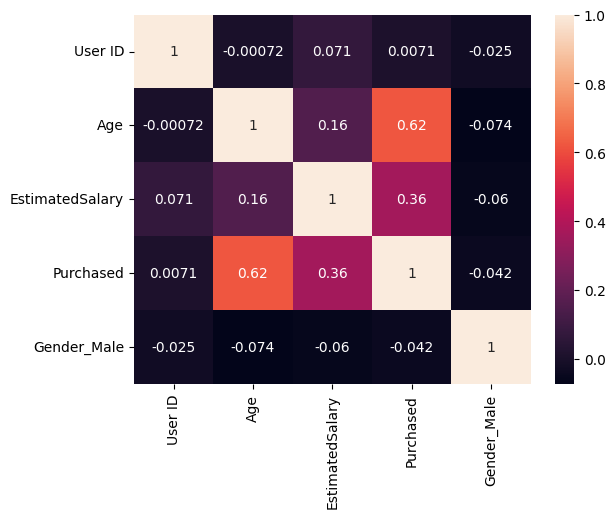

In [4]:
sn.heatmap(data.corr(), annot = True)

In [5]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [6]:
y_pred_svm = svm_model.predict(x_test)

In [7]:
print("\nClassification Report for svm model:")
print(classification_report(y_test, y_pred_svm))


Classification Report for svm model:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [8]:
randomforest_model = RandomForestClassifier()
randomforest_model.fit(x_train, y_train)

y_pred_rdfr = randomforest_model.predict(x_test)

print("\nClassification Report for RandomForest model:")
print(classification_report(y_test, y_pred_rdfr))


Classification Report for RandomForest model:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        52
           1       0.86      0.86      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



In [9]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

y_pred_logis = logistic_model.predict(x_test)

print("\nClassification Report for Logistic model:")
print(classification_report(y_test, y_pred_logis))


Classification Report for Logistic model:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [10]:
Decision_Tree_model = DecisionTreeClassifier()
Decision_Tree_model.fit(x_train, y_train)

y_pred_dctree = Decision_Tree_model.predict(x_test)

print("\nClassification Report for Decision Tree model:")
print(classification_report(y_test, y_pred_dctree))


Classification Report for Decision Tree model:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        52
           1       0.81      0.79      0.80        28

    accuracy                           0.86        80
   macro avg       0.85      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80



In [11]:
from lightgbm import LGBMClassifier
LGBM_model = LGBMClassifier()
LGBM_model.fit(x_train, y_train)

y_pred_lgbm = LGBM_model.predict(x_test)

print("\nClassification Report for LightGBM model:")
print(classification_report(y_test, y_pred_lgbm))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 115, number of negative: 205
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359375 -> initscore=-0.578078
[LightGBM] [Info] Start training from score -0.578078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
